In [131]:
from decimal import Decimal
import math

from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

# Problem1
1) Plot the spectral radiance of a blackbody as a function of λ for object at: DONE
    300 K (Earth)
    1000 K
    6000 K (Sun). 
    
2) Calculate the wavelength of peak radiation for each temperature (Wien's law) DONE
    
3) Plot it on the same figure DONE
    
TIPS: 
The finished plot should look like figure 2.12 from Rees. 

You may find that this exercise requires careful use of the MATLAB operators ./ or .*.

In [132]:
def label_axes(_plt, x_lab, y_lab, title):
    _plt.xlabel(x_lab,  fontsize=14)
    _plt.ylabel(y_lab, fontsize=14)
    _plt.title(title, fontsize=16)

In [133]:
# Source: http://stackoverflow.com/questions/6913532/display-a-decimal-in-scientific-notation
def format_e(f, prec, exp_digits):
    s = "%.*e"%(prec, f)
    mantissa, exp = s.split('e')
    # add 1 to digits as 1 is taken by sign +/-
    return "%se%+0*d"%(mantissa, exp_digits+1, int(exp))

/Users/mlimb/.virtualenvs/rs/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


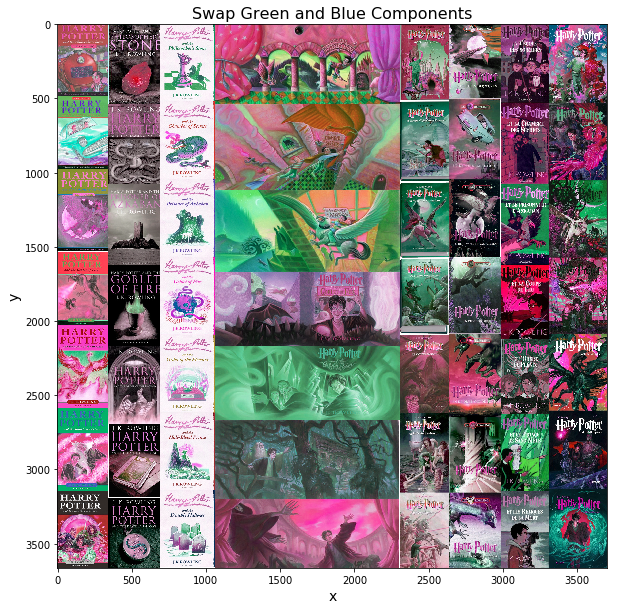

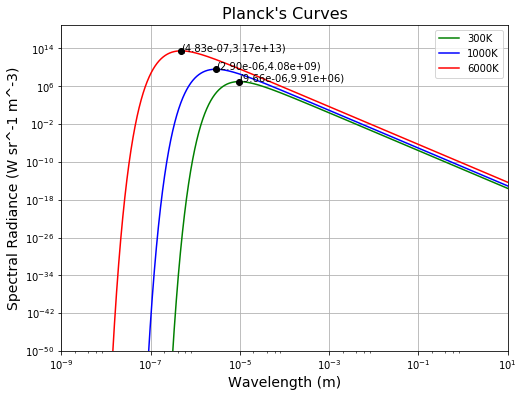

In [134]:
def make_planck(lam, T):
    pi = np.pi
    h = 6.626e-34 # Planck's constant [J s]
    c = 3.0e+8 # speed of light [m/s]
    k = 1.38e-23 # Boltzmann's constant [J/K]
    A = 2.898e-3 # Wien's law constant [K m]

    # numerator
    a = 2.0*h*c**2
    return a / (lam**5 * (np.exp(h*c/(lam*k*T))-1.0))    
    
def plot_plancks():
    # plot plancks curves for three temperatures 300K, 1000K and 6000K
    
    # Source: 
    # http://stackoverflow.com/questions/22417484/plancks-formula-for-blackbody-spectrum
    # Wavelength (x range) from 1 nm to 1 m, every 10^4 increments
    wavelengths = np.logspace(-9, 1, 10000)

    # intensity at 300K, 1000K, 6000K
    radiance300 = make_planck(wavelengths, 300.)
    radiance1000 = make_planck(wavelengths, 1000.)
    radiance6000 = make_planck(wavelengths, 6000.)

    # initialize: a) set figure size 2) x and y limits 3) labels
    fig = plt.figure(figsize=(8,6))
    plt.xlim(1e-9, 1e1)
    plt.ylim(1e-50, 1e19)
    label_axes(plt, 'Wavelength (m)', 'Spectral Radiance (W sr^-1 m^-3)',
           "Planck's Curves")

    plt.loglog(wavelengths, radiance300, 'g-', label='300K')  #Earth
    plt.loglog(wavelengths, radiance1000, 'b-', label='1000K') 
    plt.loglog(wavelengths, radiance6000, 'r-', label='6000K') #Sun
    return fig

# wien's law
b = 2.8977729*10**(-3)
calculate_peak_wavelength = lambda T: b/T

Ts = [300., 1000., 6000.]
peak_wavelengths = [calculate_peak_wavelength(T) for T in Ts]
peak_wavelength_radiance = [make_planck(peak, T) for peak , T in zip(peak_wavelengths, Ts)]
# units of b [m⋅K]

fig = plot_plancks()
ax = fig.add_subplot(111)

for x, y in zip(peak_wavelengths, peak_wavelength_radiance):  
    xx = format_e(x, 2, 2)
    yy = format_e(y, 2, 2)
    ax.annotate('({0},{1})'.format(xx, yy), xy=(xx, yy), textcoords='data')

plt.plot(peak_wavelengths, peak_wavelength_radiance, 'o', color='k')
plt.grid()
plt.legend() # uses given 'label' initialized in the plot generation 
plt.show()

# Can install bigfloat to remove RuntimeWarning: overflow encountered in exp
# Source: http://stackoverflow.com/questions/9478663/logit-and-inverse-logit-functions-for-extreme-values/9478781#9478781
# Leaving it as is for now

# Problem 2.1
1) Download a La Jolla topography file 'lajolla_swab' DONE

2) Read the topography into an array and make an image. DONE

In [135]:
def get_image_data():
    f = 'lajolla_swab'
    fbin = np.fromfile(f, dtype='int16')
    # (1440, 3240) -> seems reverse in order from Matlab
    data = np.reshape(fbin, (1440, 3240)) 
    return data

data = get_image_data()

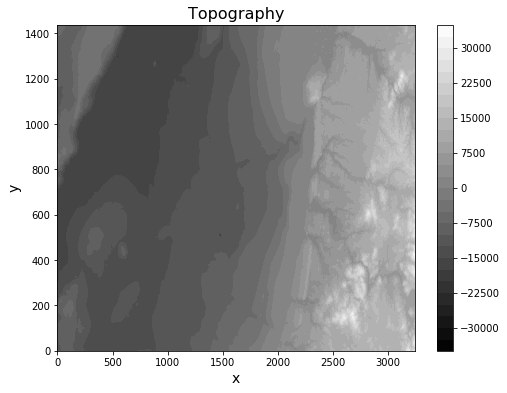

In [136]:
def plot_topo(_data, **kwargs):
    plt.figure(figsize=(8,6))
    label_axes(plt, 'x', 'y', kwargs.get('title') or 'Topography')
    plt.contourf(_data, kwargs.get('limits') if kwargs.get('limits') is not None else 30, 
                 cmap=plt.cm.gray)
    plt.colorbar()
    plt.show()
    
plot_topo(data)

## Problem 2.2

Illuminate the topography using 'diff' DONE

Tip: Set the limits in imagesc to [-1000,1000] because 
    there are some extreme slopes at the coastline.

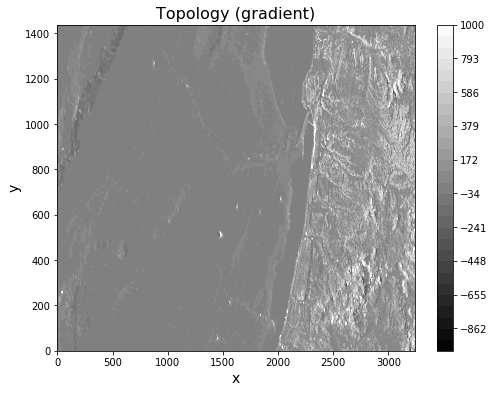

In [137]:
# diff funtion: calculates the n-th order discrete difference 
# along given axis. default (n=1)

gradient = np.diff(data)
plot_topo(gradient, limits=np.linspace(-1000, 1000, 30), title='Topology (gradient)')

# Problem 3

1) Read in a jpeg photo (file of passive-source EM radiation at three visible bands) DONE 

2) Look the red, blue, and green components separately. **DONE, but I wasn't completely sure about this part

3) Recombine the three bands into an RGB image. DONE

   Do you get what you started with? YES

5) Recombine the three bands in a different order (e.g., GBR). DONE

Do the results make sense to you? YES

Are the originally red colors now green? YES

6) Try another RGB combination. DONE

7) Write one of these recombined files to a jpg file DONE

8) Send it (and the original image) along with your code. WILL DO

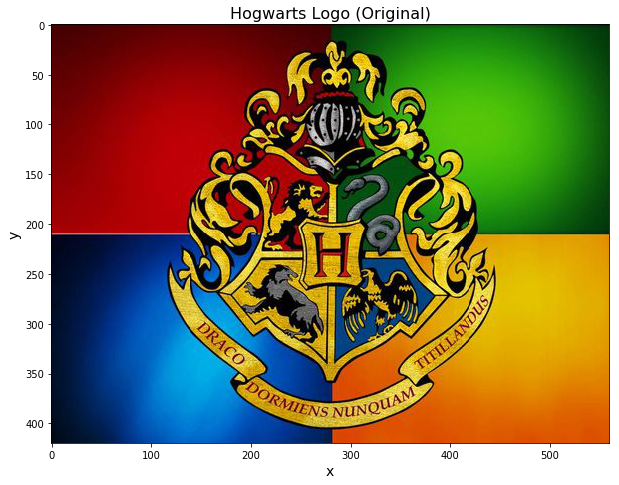

In [138]:
import os
#print os.listdir('./img')

def show_image(filename, **kwargs):
    '''
    returns Image file
    '''
    # Use PIL library to read image
    img = Image.open(filename)
  
    # Initialize figure size
    plt.figure(figsize=(10, 10))
    
    label_axes(plt, 'x', 'y', kwargs.get('title'))
    plt.imshow(img)
    plt.show()
    return img

img = show_image('img/hogwarts_logo.jpg', title='Hogwarts Logo (Original)')

In [139]:
# Separate into rgb components
r = np.array(img)[:, :, 0] 
g = np.array(img)[:, :, 1]
b = np.array(img)[:, :, 2]

# img.getbands()
# img.getcolors()
# plt.plot(img.histogram())
# print np.array(img).shape[0]

In [140]:
# Most likely, there is a better way to to this
# np.array(img).shape returns (1440, 2160, 3)
# Creating 2-D zero arrays for x and y components
# will help generate red, green and 
x_dim = np.array(img).shape[0]
y_dim = np.array(img).shape[1]
a = np.zeros((1440, 2160))

In [141]:
## Plot R, G, B components separately

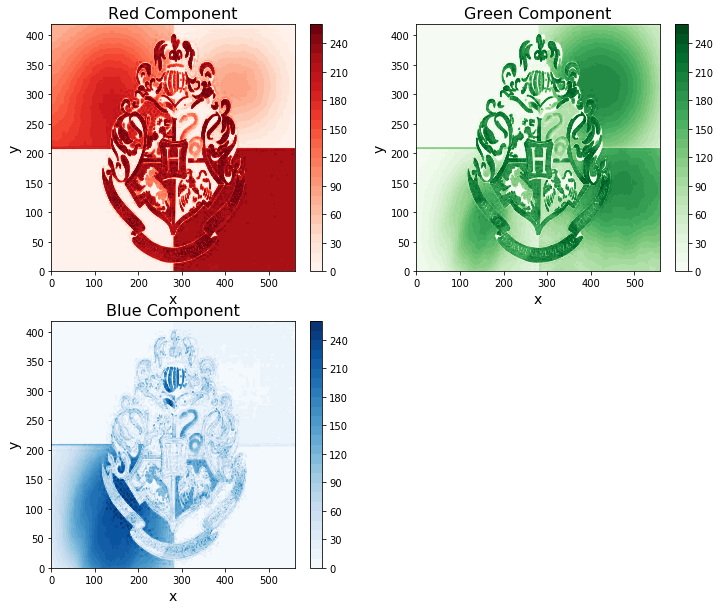

In [142]:
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.contourf(np.flipud(r), 30, cmap=plt.cm.Reds) # not sure why but image is flipped
plt.colorbar()
label_axes(plt, 'x', 'y', 'Red Component')

plt.subplot(222)
plt.contourf(np.flipud(g), 30, cmap=plt.cm.Greens)
plt.colorbar()
label_axes(plt, 'x', 'y', 'Green Component')

plt.subplot(223)
plt.contourf(np.flipud(b), 30, cmap=plt.cm.Blues)
plt.colorbar()
label_axes(plt, 'x', 'y', 'Blue Component')
plt.show()

In [143]:
### Recovered Image

### Image with Swapped RGB components

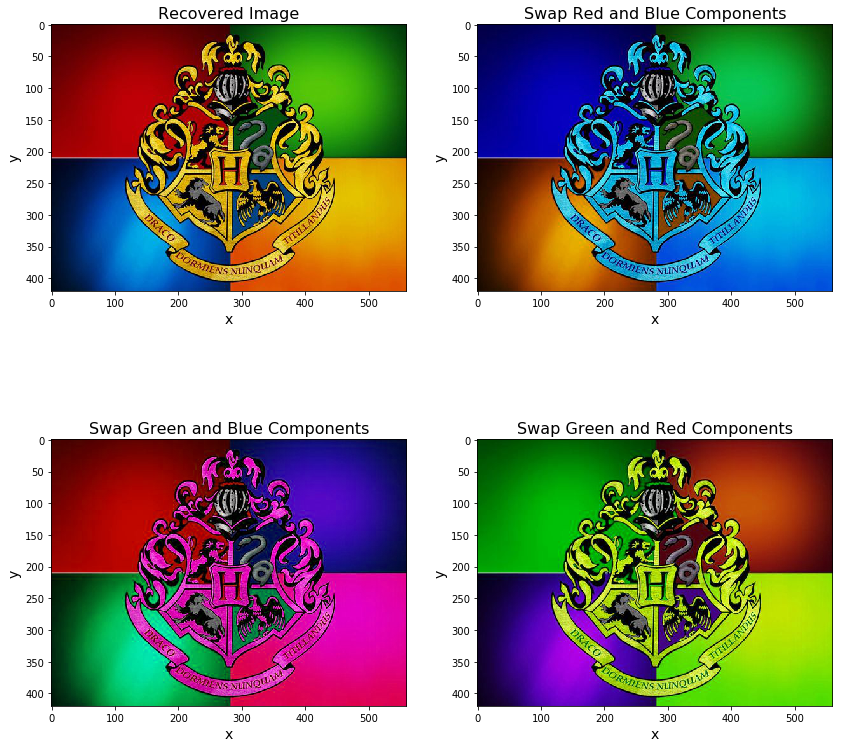

In [144]:
# split image into rgb components  
r, g, b = img.split()

# set figure size
plt.figure(figsize=(14, 14))

# reconstructed image
recovered_image = Image.fromarray(np.stack([r, g, b], axis=2))

# reconstructed image from rgb components
plt.subplot(221)
label_axes(plt, 'x', 'y', 'Recovered Image')
plt.imshow(recovered_image)

# swap red and blue
plt.subplot(222)
label_axes(plt, 'x', 'y', 'Swap Red and Blue Components')
plt.imshow(Image.merge("RGB", (b, g, r)))

# swap green and bue
plt.subplot(223)
label_axes(plt, 'x', 'y', 'Swap Green and Blue Components')
plt.imshow(Image.merge("RGB", (r, b, g)))

# swap green and red
plt.subplot(224)
label_axes(plt, 'x', 'y', 'Swap Green and Red Components')

img_rgb = Image.merge("RGB", (g, r, b))
plt.imshow(img_rgb)

plt.show()

In [145]:
### Try a Different Image

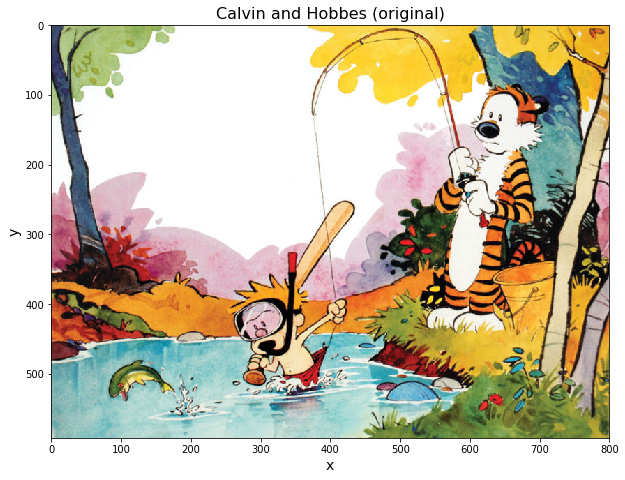

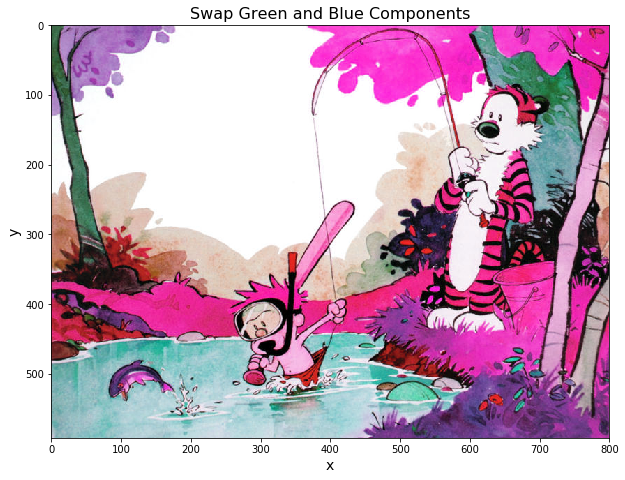

In [146]:
def swap_green_and_blue(_img):
    r, g, b = _img.split()
    img_rbg = Image.merge("RGB", (r, b, g))
    
    plt.figure(figsize=(10, 10))
    label_axes(plt, 'x', 'y', 'Swap Green and Blue Components')
    
    plt.imshow(img_rbg)
    return img_rbg

# Recall: show_image takes filename and plot title as arugments
img_ch = show_image('img/calvin_hobbes.jpg', title='Calvin and Hobbes (original)')
swap_green_and_blue(img_ch)
plt.show()


### Hobbiton

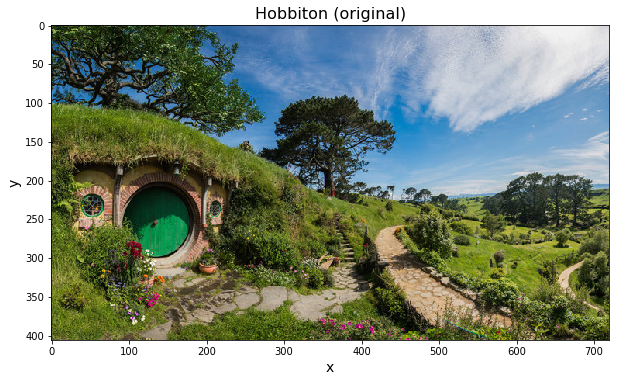

In [147]:
# Would be better to show the images side by side, but good for now
img_hobbiton = show_image('img/bag-end.jpg', title='Hobbiton (original)')
img_hobbiton_rbg = swap_green_and_blue(img_hobbiton)

In [148]:
img_hobbiton_rbg.save('Hobbiton_rbg.jpg')

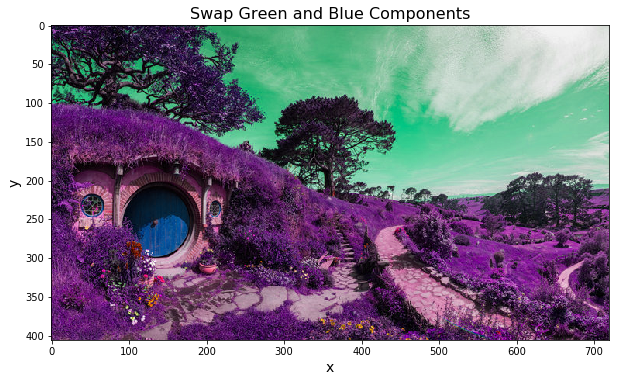

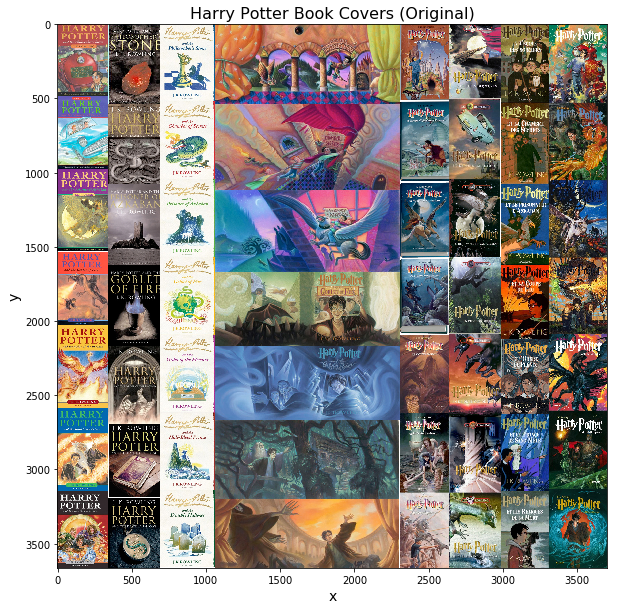

In [149]:
# Would be nice to give prefered output image size as an argument to show_image function
# but will take too much time to refactor

img_hp = show_image('img/hp_covers.jpg', title='Harry Potter Book Covers (Original)')
img_hp_rbg = swap_green_and_blue(img_hp)
img_hp.save('Harry_Potter_book_covers_original.jpg')
img_hp_rbg.save('Harry_Potter_book_covers_rbg.jpg')